In [1]:
#Lab05 - Perceptron
#G.THANMAI
#BL.EN.U4CSE21054
#8-10-2023(SUNDAY)

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel("lab05.xlsx")
df

,Customer,Candies(#),Mangoes(kg),Milk Packets(#),Payment(Rs),High Value Tx
0,C_1,20,6,2,386,Yes
1,C_2,16,3,6,289,Yes
2,C_3,27,6,2,393,Yes
3,C_4,19,1,2,110,No
4,C_5,24,4,2,280,Yes
5,C_6,22,1,5,167,No
6,C_7,15,4,2,271,Yes
7,C_8,18,4,2,274,Yes
8,C_9,21,1,4,148,No
9,C_10,16,2,4,198,No


In [3]:
import numpy as np
df = df.drop('Customer', axis=1)
df['High Value Tx'] = df['High Value Tx'].replace({'Yes': 1, 'No': 0})
print(df)

   Candies(#)  Mangoes(kg)  Milk Packets(#)  Payment(Rs)  High Value Tx
0          20            6                2          386              1
1          16            3                6          289              1
2          27            6                2          393              1
3          19            1                2          110              0
4          24            4                2          280              1
5          22            1                5          167              0
6          15            4                2          271              1
7          18            4                2          274              1
8          21            1                4          148              0
9          16            2                4          198              0


Epoch 0: Total Error = -3
Convergence achieved at epoch 74


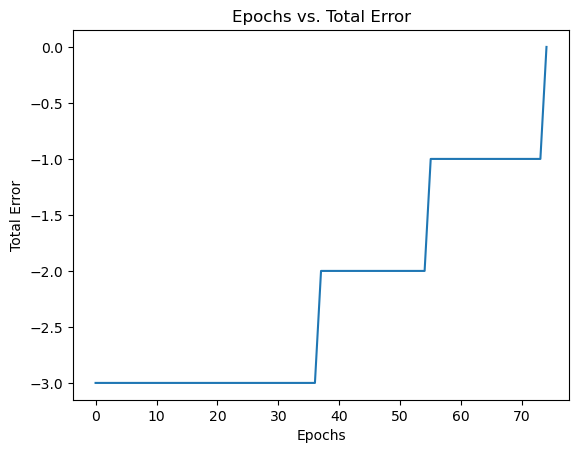

Final Weights:
[ 1.7 -1.6 -1.6]
Test Results:
Input: [1 0 0] => Output: 1
Input: [1 0 1] => Output: 1
Input: [1 1 0] => Output: 1
Input: [1 1 1] => Output: 0


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initial weights and learning rate
weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# AND gate training data in the form of dictionary
and_training_data = [
    {'input': np.array([1, 0, 0]), 'output': 0},
    {'input': np.array([1, 0, 1]), 'output': 0},
    {'input': np.array([1, 1, 0]), 'output': 0},
    {'input': np.array([1, 1, 1]), 'output': 1},
]

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron
epochs = 1000  # Maximum number of training epochs
convergence_error = 0.002  
error_vals = []

for epoch in range(epochs):
    total_error = 0
    
    for o in and_training_data:
        input_data = o['input']
        target_output = o['output']
        
        # Weighted sum
        weighted_sum = np.dot(input_data, weights)
        
        # Apply the step activation function
        predicted_output = step_function(weighted_sum)
        
        # Calculate the error
        error = target_output - predicted_output
        
        # Update the weights
        delta_w = learning_rate * error * input_data
        weights += delta_w
        
        total_error += error

    error_vals.append(total_error)

    # Print the total error for this epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Total Error = {total_error}")

    # Check for convergence
    if abs(total_error) <= convergence_error:
        print(f"Convergence achieved at epoch {epoch}")
        break

# Create a plot of epochs against error values
plt.plot(range(len(error_vals)), error_vals)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Epochs vs. Total Error')
plt.show()

# the final weights
print("Final Weights:")
print(weights)

# Test the perceptron with the AND gate inputs
test_inputs = [
    np.array([1, 0, 0]),
    np.array([1, 0, 1]),
    np.array([1, 1, 0]),
    np.array([1, 1, 1]),
]

print("Test Results:")
for test_input in test_inputs:
    weighted_sum = np.dot(test_input, weights)
    output = step_function(weighted_sum)
    print(f"Input: {test_input[0:]} => Output: {output}")


Sigmoid Convergence achieved at epoch 30400
ReLU Convergence achieved at epoch 596


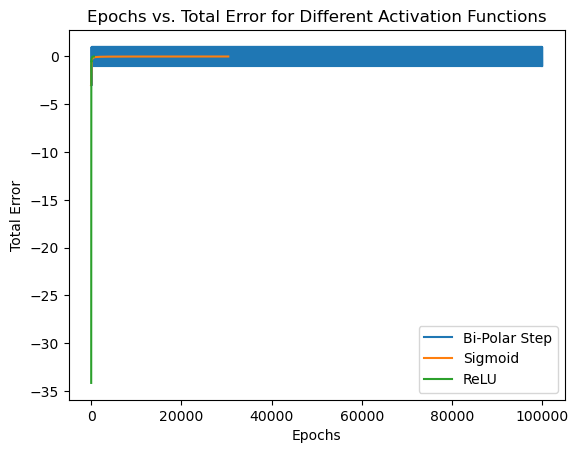

Sigmoid Convergence Epoch: 30400
ReLU Convergence Epoch: 596


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# the initial weights and learning rate
weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# AND gate training data
training_data = [
    {'input': np.array([1, 0, 0]), 'output': 0},
    {'input': np.array([1, 0, 1]), 'output': 0},
    {'input': np.array([1, 1, 0]), 'output': 0},
    {'input': np.array([1, 1, 1]), 'output': 1},
]

# Bi-Polar Step activation function
def bipolar_step_function(x):
    if(x>0):
        return 1
    elif(x==0):
        return 0
    else: return -1

# Sigmoid activation function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu_function(x):
    return max(0, x)

activation_func = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

convergence_epochs = {}

for act_name, act_fun in activation_func.items():
    weights = np.array([10, 0.2, -0.75])  # Reset weights for each activation function
    error_values = []
    
    for epoch in range(100000):  # Maximum of 1000 epochs
        total_error = 0
        
        for obs in training_data:
            input_data = obs['input']
            target_output = obs['output']
            
            # Calculate the weighted sum
            weighted_sum = np.dot(input_data, weights)
            
            # Apply the current activation function
            pred_output = act_fun(weighted_sum)
            
            # Calculate the error
            error = target_output - pred_output
            
            # Update the weights
            delta_w = learning_rate * error * input_data
            weights += delta_w
            
            total_error += error
        
        error_values.append(total_error)
        
        # Check for convergence
        if abs(total_error) <= 0.002:
            print(f"{act_name} Convergence achieved at epoch {epoch}")
            convergence_epochs[act_name] = epoch
            break

    # Create a plot of epochs against error values for each activation function
    plt.plot(range(len(error_values)), error_values, label=act_name)

# Configure the plot
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Epochs vs. Total Error for Different Activation Functions')
plt.legend()
plt.show()

# Compare convergence epochs for different activation functions
for act_name, epochs in convergence_epochs.items():
    print(f"{act_name} Convergence Epoch: {epochs}")
           


CONVERGENCE EPOCHS FOR DIFFERENT LEARNING RATES:
[38, 19, 12, 9, 8, 6, 5, 4, 4, 4]


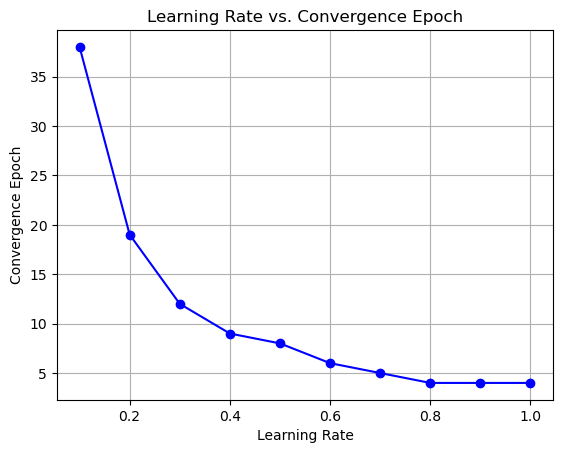

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initial weights
weights = np.array([10, 0.2, -0.75])

# AND gate training data
training_data = [
    {'input': np.array([1, 0, 0]), 'output': 0},
    {'input': np.array([1, 0, 1]), 'output': 0},
    {'input': np.array([1, 1, 0]), 'output': 0},
    {'input': np.array([1, 1, 1]), 'output': 1},
]

#learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def step_function(x):
    return 1 if x >= 0 else 0

# Function to train the perceptron and return the convergence epoch
def train_perceptron(learning_rate):
    weight_copy = np.array(weights)  # Make a copy of initial weights
    convergence_epoch = None
    
    for epoch in range(2000):  # Maximum of 2000 epochs
        total_error = 0
        
        for data in training_data:
            input_data = data['input']
            target_output = data['output']
            
            # Calculate the weighted sum
            weighted_sum = np.dot(input_data, weight_copy)
            
            # Apply the step activation function
            pred_output = step_function(weighted_sum)
            
            # Calculate the error
            error = target_output - pred_output
            
            # Update the weights
            delta_w = learning_rate * error * input_data
            weight_copy += delta_w
            
            total_error += error
        
        # Check for convergence
        if abs(total_error) <= 0.002:
            convergence_epoch = epoch
            break
    
    return convergence_epoch

# Train the perceptron with different learning rates and record convergence epochs
convergence_epochs = []

for lr in learning_rates:
    convergence_epoch = train_perceptron(lr)
    convergence_epochs.append(convergence_epoch)

#Printing convergence epochs

print("CONVERGENCE EPOCHS FOR DIFFERENT LEARNING RATES:")
print(convergence_epochs)

# plot showinh learning rates vs. convergence epochs
plt.plot(learning_rates, convergence_epochs, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Convergence Epoch')
plt.title('Learning Rate vs. Convergence Epoch')
plt.grid(True)
plt.show()


Epoch 0: Total Error = 2
Convergence achieved at epoch 91


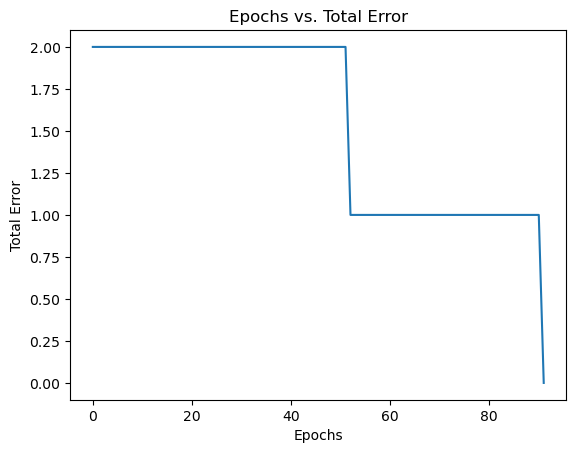

Final Weights:
[-2.85  2.75  1.85]
Test Results:
Input: [1 0 0] => Output: 0
Input: [1 0 1] => Output: 0
Input: [1 1 0] => Output: 0
Input: [1 1 1] => Output: 1


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# initial weights, learning rate, and convergence threshold
initial_weights = np.array([-10, 0.2, -0.75])
learning_rate = 0.05
convergence_threshold = 0.002

#training data for the XOR gate
training_data_xor = [
    {'input': np.array([1, 0, 0]), 'output': 0},
    {'input': np.array([1, 0, 1]), 'output': 1},
    {'input': np.array([1, 1, 0]), 'output': 1},
    {'input': np.array([1, 1, 1]), 'output': 0},
]

# Define the step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron
max_epochs = 1000
error_values = []

weights = np.copy(initial_weights)  # Initialize weights

for epoch in range(max_epochs):
    total_error = 0
    
    for obs in training_data_xor:
        input_data = obs['input']
        target_output = obs['output']
        
        # Calculate the weighted sum
        weighted_sum = np.dot(input_data, weights)
        
        # Apply the step activation function
        predicted_output = step_function(weighted_sum)
        
        # Calculate the error
        error = target_output - predicted_output
        
        # Update the weights
        delta_weights = learning_rate * error * input_data
        weights += delta_weights
        
        total_error += error

    error_values.append(total_error)

    # Print the total error for this epoch
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Total Error = {total_error}")

    # Check for convergence
    if abs(total_error) <= convergence_threshold:
        print(f"Convergence achieved at epoch {epoch}")
        break

# plot of epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Epochs vs. Total Error')
plt.show()

#final weights
print("Final Weights:")
print(weights)

# Test the perceptron with XOR gate inputs
test_inputs = [
    np.array([1, 0, 0]),
    np.array([1, 0, 1]),
    np.array([1, 1, 0]),
    np.array([1, 1, 1]),
]

print("Test Results:")
for test_input in test_inputs:
    weighted_sum = np.dot(test_input, weights)
    output = step_function(weighted_sum)
    print(f"Input: {test_input[0:]} => Output: {output}")


Bi-Polar Step Convergence achieved at epoch 47
Sigmoid Convergence achieved at epoch 837
ReLU Convergence achieved at epoch 237


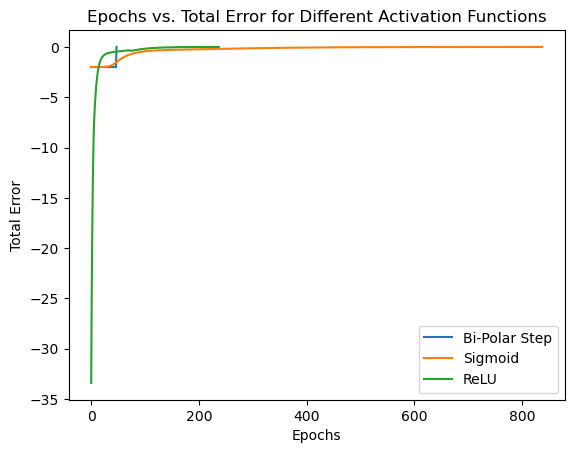

Bi-Polar Step Convergence Epoch: 47
Sigmoid Convergence Epoch: 837
ReLU Convergence Epoch: 237


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# the initial weights and learning rate
weights = np.array([10, 0.2, -0.75])
learning_rate = 0.05

# AND gate training data
training_data_xor = [
    {'input': np.array([1, 0, 0]), 'output': 0},
    {'input': np.array([1, 0, 1]), 'output': 1},
    {'input': np.array([1, 1, 0]), 'output': 1},
    {'input': np.array([1, 1, 1]), 'output': 0},
]

# Bi-Polar Step activation function
def bipolar_step_function(x):
    if(x>0):
        return 1
    elif(x==0):
        return 0
    else: return -1

# Sigmoid activation function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu_function(x):
    return max(0, x)

activation_func = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

convergence_epochs = {}

for act_name, act_fun in activation_func.items():
    weights = np.array([10, 0.2, -0.75])  # Reset weights for each activation function
    error_values = []
    
    for epoch in range(1000):  # Maximum of 1000 epochs
        total_error = 0
        
        for obs in training_data_xor:
            input_data = obs['input']
            target_output = obs['output']
            
            # Calculate the weighted sum
            weighted_sum = np.dot(input_data, weights)
            
            # Apply the current activation function
            pred_output = act_fun(weighted_sum)
            
            # Calculate the error
            error = target_output - pred_output
            
            # Update the weights
            delta_w = learning_rate * error * input_data
            weights += delta_w
            
            total_error += error
        
        error_values.append(total_error)
        
        # Check for convergence
        if abs(total_error) <= 0.002:
            print(f"{act_name} Convergence achieved at epoch {epoch}")
            convergence_epochs[act_name] = epoch
            break

    # Create a plot of epochs against error values for each activation function
    plt.plot(range(len(error_values)), error_values, label=act_name)

# Configure the plot
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Epochs vs. Total Error for Different Activation Functions')
plt.legend()
plt.show()

# Compare convergence epochs for different activation functions
for act_name, epochs in convergence_epochs.items():
    print(f"{act_name} Convergence Epoch: {epochs}")
           


CONVERGENCE EPOCHS FOR DIFFERENT LEARNING RATES:
[44, 22, 14, 11, 8, 7, 5, 5, 4, 3]


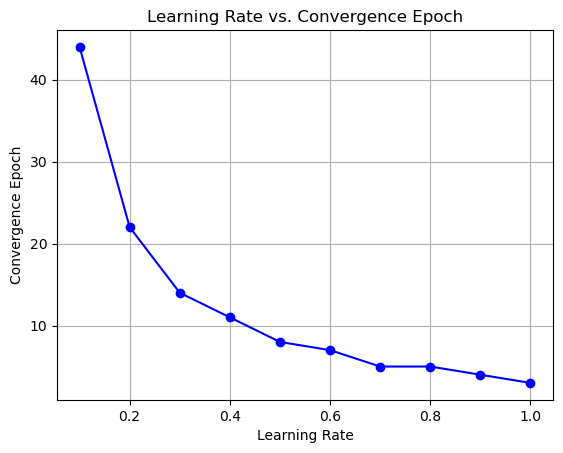

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initial weights
weights = np.array([10, 0.2, -0.75])

# AND gate training data
training_data_xor = [
    {'input': np.array([1, 0, 0]), 'output': 0},
    {'input': np.array([1, 0, 1]), 'output': 1},
    {'input': np.array([1, 1, 0]), 'output': 1},
    {'input': np.array([1, 1, 1]), 'output': 0},
]

#learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def step_function(x):
    return 1 if x >= 0 else 0

# Function to train the perceptron and return the convergence epoch
def train_perceptron(learning_rate):
    weight_copy = np.array(weights)  # Make a copy of initial weights
    convergence_epoch = None
    
    for epoch in range(2000):  # Maximum of 2000 epochs
        total_error = 0
        
        for data in training_data_xor:
            input_data = data['input']
            target_output = data['output']
            
            # Calculate the weighted sum
            weighted_sum = np.dot(input_data, weight_copy)
            
            # Apply the step activation function
            pred_output = step_function(weighted_sum)
            
            # Calculate the error
            error = target_output - pred_output
            
            # Update the weights
            delta_w = learning_rate * error * input_data
            weight_copy += delta_w
            
            total_error += error
        
        # Check for convergence
        if abs(total_error) <= 0.002:
            convergence_epoch = epoch
            break
    
    return convergence_epoch

# Train the perceptron with different learning rates and record convergence epochs
convergence_epochs = []

for lr in learning_rates:
    convergence_epoch = train_perceptron(lr)
    convergence_epochs.append(convergence_epoch)

#Printing convergence epochs

print("CONVERGENCE EPOCHS FOR DIFFERENT LEARNING RATES:")
print(convergence_epochs)

# plot showinh learning rates vs. convergence epochs
plt.plot(learning_rates, convergence_epochs, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Convergence Epoch')
plt.title('Learning Rate vs. Convergence Epoch')
plt.grid(True)
plt.show()


In [10]:
#Converting data into array
df = np.array(df)

#Normalizing  the data
max_val = np.max(df[:, :-1], axis=0)
df[:, :-1] = df[:, :-1] / max_val

#Intializing the weights
weights = np.array([10,0.5,1.2,-0.25]) 
learning_rate = 0.2

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Training the perceptron
epochs = 1000
for epoch in range(epochs):
    total_error = 0
    for obs in df:
        input_data = obs[:-1]
        target_output = obs[-1]
        
        # Calculate the weighted sum
        weighted_sum = np.dot(input_data, weights)
        
        # Apply the sigmoid activation function
        predicted_output = sigmoid(weighted_sum)
        
        # Calculate the error
        error = target_output - predicted_output
        
        # Update the weights using gradient descent
        delta_w = learning_rate * error * input_data
        weights += delta_w
        
        total_error += abs(error)
        
    # Check for convergence (stop training if error is sufficiently low)
    if total_error < 0.01:
        print(f"Convergence achieved at epoch {epoch}")
        break
    
# Test the perceptron
print("Trained Weights:", weights)
print("\nTest Results:")
for obs in df:
    input_data = obs[:-1]
    target_output = obs[-1]
    
    weighted_sum = np.dot(input_data, weights)
    predicted_output = sigmoid(weighted_sum)
    
    classification = "1" if predicted_output > 0.5 else "0"
    
    print(f"Input: {input_data}, Target Output: {target_output}, Predicted Output: {predicted_output:.2f}, Classification: {classification}")

Trained Weights: [10.00030765  5.28477235  5.29635957 -0.24969235]

Test Results:
Input: [0 1 0 0], Target Output: 1, Predicted Output: 0.99, Classification: 1
Input: [0 0 1 0], Target Output: 1, Predicted Output: 1.00, Classification: 1
Input: [1 1 0 1], Target Output: 1, Predicted Output: 1.00, Classification: 1
Input: [0 0 0 0], Target Output: 0, Predicted Output: 0.50, Classification: 0
Input: [0 0 0 0], Target Output: 1, Predicted Output: 0.50, Classification: 0
Input: [0 0 0 0], Target Output: 0, Predicted Output: 0.50, Classification: 0
Input: [0 0 0 0], Target Output: 1, Predicted Output: 0.50, Classification: 0
Input: [0 0 0 0], Target Output: 1, Predicted Output: 0.50, Classification: 0
Input: [0 0 0 0], Target Output: 0, Predicted Output: 0.50, Classification: 0
Input: [0 0 0 0], Target Output: 0, Predicted Output: 0.50, Classification: 0


In [11]:
import numpy as np

# Extract the input features and target outputs
x = df[:, :-1]
y = df[:, -1]

# Add a bias term (column of ones) to the input features
x = np.hstack((np.ones((x.shape[0], 1)), x))

# Calculate the weights using matrix pseudo-inverse
weights_pseudo_inverse = np.linalg.pinv(x).dot(y)

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Make predictions using the calculated weights
predictions_pseudo_inverse = sigmoid(x.dot(weights_pseudo_inverse))

# Threshold the predictions to classify as "High Value" or "Low Value"
classifications_pseudo_inverse = np.where(predictions_pseudo_inverse > 0.5, 1, 0)

# Display the results
print("Weights (Matrix Pseudo-Inverse):", weights_pseudo_inverse)
print("\nPredictions (Matrix Pseudo-Inverse):", predictions_pseudo_inverse)
print("\nClassifications (Matrix Pseudo-Inverse):", classifications_pseudo_inverse)


Weights (Matrix Pseudo-Inverse): [4.28571429e-01 1.99840144e-15 5.71428571e-01 5.71428571e-01
 9.43689571e-16]

Predictions (Matrix Pseudo-Inverse): [0.73105858 0.73105858 0.73105858 0.60553249 0.60553249 0.60553249
 0.60553249 0.60553249 0.60553249 0.60553249]

Classifications (Matrix Pseudo-Inverse): [1 1 1 1 1 1 1 1 1 1]


In [12]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the AND gate training data
A = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
B = np.array([[0], [0], [0], [1]])

# Define the neural network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8]])
biases_hidden = np.array([[0.1, 0.2, 0.3, 0.4]])
weights_hidden_output = np.array([
    [0.9],
    [0.10],
    [0.11],
    [0.12]])
biases_output = np.array([[0.5]])

# Set the learning rate and convergence error threshold
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# Training the neural network
for epoch in range(max_epochs):
    # Forward pass
    hidden_layer_input = np.dot(A, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Compute the loss (mean squared error)
    loss = np.mean((B - output_layer_output) ** 2)
    
    # Backpropagation
    output_error = B - output_layer_output
    d_output = output_error * sigmoid_derivative(output_layer_output)
    
    hidden_layer_error = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += A.T.dot(d_hidden_layer) * learning_rate
    biases_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
    # Check for convergence
    if loss <= convergence_error:
        print(f"Convergence achieved at epoch {epoch}")
        break

# Test the trained neural network
test_inputs = A
hidden_layer_input = np.dot(test_inputs, weights_input_hidden) + biases_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
output_layer_output = sigmoid(output_layer_input)

# Print the test results
print("Test Results:")
for i, test_input in enumerate(test_inputs):
    predicted_output = output_layer_output[i][0]
    actual_output = B[i][0]
    print(f"Input: {test_input}, Predicted Output: {predicted_output:.2f}, Actual Output: {actual_output}")


Test Results:
Input: [0 0], Predicted Output: 0.25, Actual Output: 0
Input: [0 1], Predicted Output: 0.29, Actual Output: 0
Input: [1 0], Predicted Output: 0.28, Actual Output: 0
Input: [1 1], Predicted Output: 0.32, Actual Output: 1


In [13]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the XOR gate training data
A = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
B = np.array([[0], [1], [1], [0]])

# Define the neural network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8]])
biases_hidden = np.array([[0.1, 0.2, 0.3, 0.4]])
weights_hidden_output = np.array([
    [0.9],
    [0.10],
    [0.11],
    [0.12]])
biases_output = np.array([[0.5]])

# Set the learning rate and convergence error threshold
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# Training the neural network
for epoch in range(max_epochs):
    # Forward pass
    hidden_layer_input = np.dot(A, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Compute the loss (mean squared error)
    loss = np.mean((B - output_layer_output) ** 2)
    
    # Backpropagation
    output_error = B - output_layer_output
    d_output = output_error * sigmoid_derivative(output_layer_output)
    
    hidden_layer_error = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += A.T.dot(d_hidden_layer) * learning_rate
    biases_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
    # Check for convergence
    if loss <= convergence_error:
        print(f"Convergence achieved at epoch {epoch}")
        break

# Test the trained neural network
test_inputs = A
hidden_layer_input = np.dot(test_inputs, weights_input_hidden) + biases_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
output_layer_output = sigmoid(output_layer_input)

# Print the test results
print("Test Results:")
for i, test_input in enumerate(test_inputs):
    predicted_output = output_layer_output[i][0]
    actual_output = B[i][0]
    print(f"Input: {test_input}, Predicted Output: {predicted_output:.2f}, Actual Output: {actual_output}")


Test Results:
Input: [0 0], Predicted Output: 0.50, Actual Output: 0
Input: [0 1], Predicted Output: 0.50, Actual Output: 1
Input: [1 0], Predicted Output: 0.50, Actual Output: 1
Input: [1 1], Predicted Output: 0.50, Actual Output: 0


In [14]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the AND gate training data
A = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Bin = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # Updated target outputs

# Define the neural network architecture
input_size = 2
hidden_size = 4
output_size = 2  # Two output nodes

# Manually specify weights and biases (you can adjust these values as needed)
weights_input_hidden = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8]
])

biases_hidden = np.array([[0.1, 0.2, 0.3, 0.4]])

weights_hidden_output = np.array([
    [0.9, 0.10],
    [0.11, 0.12],
    [0.13, 0.14],
    [0.15, 0.16]
])

biases_output = np.array([[0.5, 0.6]])

# Set the learning rate and convergence error threshold
learning_rate = 0.05
convergence_error = 0.002
max_epochs = 1000

# Training the neural network
for epoch in range(max_epochs):
    # Forward pass
    hidden_layer_input = np.dot(A, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Compute the loss (mean squared error)
    loss = np.mean((Bin - output_layer_output) ** 2)
    
    # Backpropagation
    output_error = Bin - output_layer_output
    d_output = output_error * sigmoid_derivative(output_layer_output)
    
    hidden_layer_error = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = hidden_layer_error * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += A.T.dot(d_hidden_layer) * learning_rate
    biases_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    
    # Check for convergence
    if loss <= convergence_error:
        print(f"Convergence achieved at epoch {epoch}")
        break

# Test the trained neural network
test_inputs = A
hidden_layer_input = np.dot(test_inputs, weights_input_hidden) + biases_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
output_layer_output = sigmoid(output_layer_input)

# Print the test results
print("Test Results:")
for i, test_input in enumerate(test_inputs):
    predicted_output = output_layer_output[i]
    actual_output = Bin[i]
    print(f"Input: {test_input}, Predicted Output: {predicted_output}, Actual Output: {actual_output}")


Test Results:
Input: [0 0], Predicted Output: [0.82530092 0.20517771], Actual Output: [1 0]
Input: [0 1], Predicted Output: [0.71324485 0.28034663], Actual Output: [1 0]
Input: [1 0], Predicted Output: [0.70306479 0.29495364], Actual Output: [1 0]
Input: [1 1], Predicted Output: [0.57909473 0.37147204], Actual Output: [0 1]


In [15]:
from sklearn.neural_network import MLPClassifier

# Define the training data and labels for AND gate
A_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
B_and = [0, 0, 0, 1]

# Define the training data and labels for XOR gate
A_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
B_xor = [0, 1, 1, 0]

# Create an MLPClassifier for the AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', learning_rate_init=0.1, max_iter=1000)

# Train the AND gate classifier
and_classifier.fit(A_and, B_and)

# Create an MLPClassifier for the XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', learning_rate_init=0.1, max_iter=1000)

# Train the XOR gate classifier
xor_classifier.fit(A_xor, B_xor)

# Test the classifiers
print("AND Gate Classifier Predictions:")
for x in A_and:
    prediction = and_classifier.predict([x])
    print(f"Input: {x}, Predicted Output: {prediction[0]}")

print("\nXOR Gate Classifier Predictions:")
for x in A_xor:
    prediction = xor_classifier.predict([x])
    print(f"Input: {x}, Predicted Output: {prediction[0]}")


AND Gate Classifier Predictions:
Input: [0, 0], Predicted Output: 0
Input: [0, 1], Predicted Output: 0
Input: [1, 0], Predicted Output: 0
Input: [1, 1], Predicted Output: 1

XOR Gate Classifier Predictions:
Input: [0, 0], Predicted Output: 0
Input: [0, 1], Predicted Output: 1
Input: [1, 0], Predicted Output: 1
Input: [1, 1], Predicted Output: 0


In [16]:
df = pd.read_excel("embeddingsdata.xlsx")
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Extract input features (X) and target labels (y)
x = df.drop('Label', axis=1)  
y = df['Label']

#train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes=(100, ), 
    activation='relu',           # Using 'relu' as the activation function 
    learning_rate_init=0.0001,    # the learning rate is taken as 0.01
    max_iter=1000                # Maximum number of iterations 1000
)

#Fit the MLPClassifier to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average = "micro")
recall = recall_score(y_test, y_pred,average = "micro")
f1 = f1_score(y_test, y_pred,average = "micro")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall *100:.2f}")
print(f"F1 Score: {f1*100:.2f}")


[0 0 1 0 0 2 0 0 1 0 0 0 0 6 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 6 0 1 0 0 0 1 1
 0 1 1 0 0 2 0 1 0 1 1 0 0 6 1 1 0 1 1 1 0 2 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 2 1 2 6 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 2 0 1 1 1 2 1 1 1 2 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 0 1 0 2 0 0 0 0 0 1 1 0 1 1 0 2 6 1 0 2 0
 1 0 0 2 1 1 1 0 1 0 0 1 2 0 6 5 1 1 0 0 2 1 2 0 0 5 0 0 0 0 0 1]
Accuracy: 60.00%
Precision: 60.00
Recall: 60.00
F1 Score: 60.00


C:\Users\thanm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing with identity activation function:
Accuracy with identity activation function: 57.78%
Testing with logistic activation function:
Accuracy with logistic activation function: 58.33%
Testing with tanh activation function:
Accuracy with tanh activation function: 53.89%
Testing with relu activation function:
Accuracy with relu activation function: 60.00%


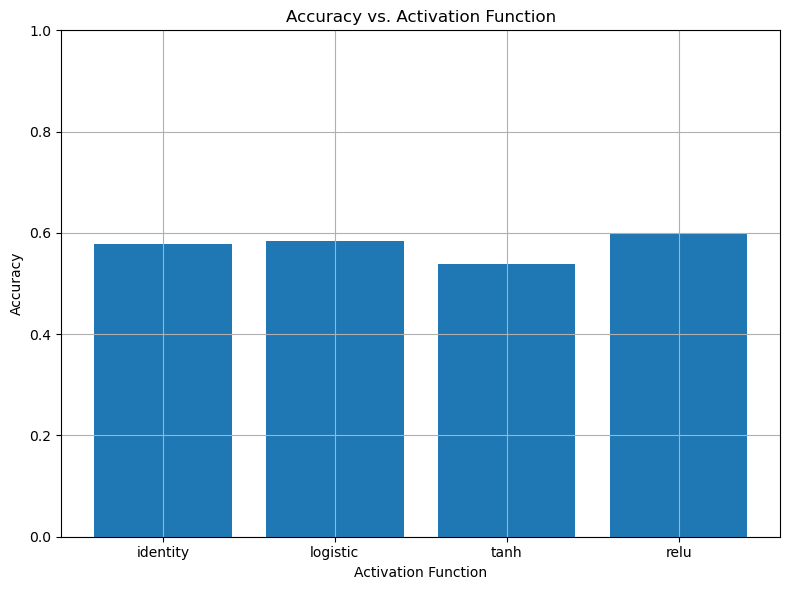

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Extract input features (X) and target labels (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# Lists to store accuracy results
accuracies = []

for activation_function in activation_functions:
    print(f"Testing with {activation_function} activation function:")
    
    # Create an MLPClassifier with the specified activation function
    mlp_classifier = MLPClassifier(
        hidden_layer_sizes=(500,),
        activation=activation_function,
        learning_rate_init=0.01,
        max_iter=1000  # Maximum number of iterations
    )

    # Fit the MLPClassifier to the training data
    mlp_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = mlp_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with {activation_function} activation function: {accuracy * 100:.2f}%")

# Plot the accuracy results
plt.figure(figsize=(8, 6))
plt.bar(activation_functions, accuracies)
plt.title("Accuracy vs. Activation Function")
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1 for accuracy values
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Testing with hidden layer size: (50,)
Accuracy with hidden layer size (50,): 57.78%
Testing with hidden layer size: (100,)
Accuracy with hidden layer size (100,): 59.44%
Testing with hidden layer size: (150,)
Accuracy with hidden layer size (150,): 56.67%
Testing with hidden layer size: (500,)
Accuracy with hidden layer size (500,): 59.44%


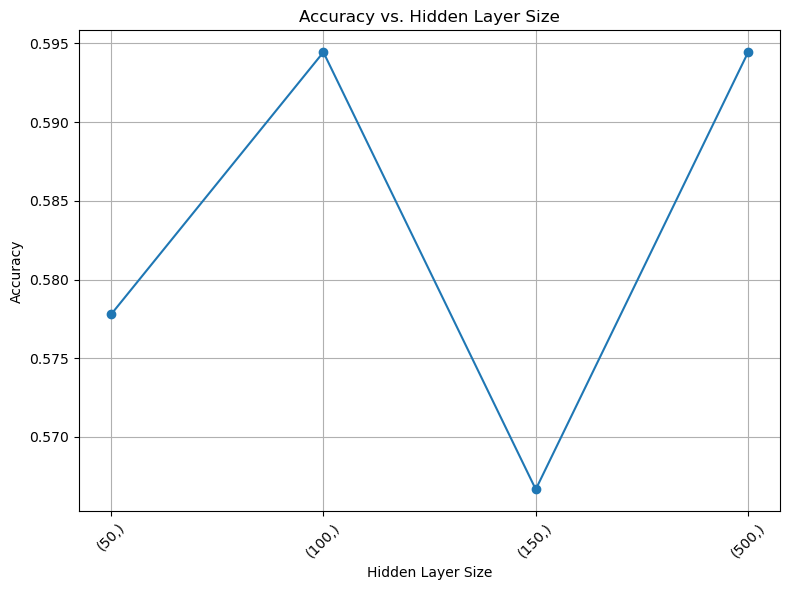

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Extract inpatures (X) and target labels (y)
X = df.drop('Label', axis=1)  # Assuming 'target' is the name of the column containing the labels
y = df['Label']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different hidden layer sizes
hidden_layer_sizes = [(50,), (100,), (150,),(500,)]

accuracies = []

# Iterate through different hidden layer sizes
for layer_size in hidden_layer_sizes:
    print(f"Testing with hidden layer size: {layer_size}")

    # Create an MLPClassifier with the specified hidden layer size
    mlp_classifier = MLPClassifier(
        hidden_layer_sizes=layer_size,
        activation='relu',        
        learning_rate_init=0.01,   # learning rate is 0.01
        max_iter=1000               # Maximum number of iterations
    )

    # Fit the MLPClassifier to the training data
    mlp_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = mlp_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with hidden layer size {layer_size}: {accuracy * 100:.2f}%")

# Plot the accuracy results
plt.figure(figsize=(8, 6))
plt.plot([str(layer) for layer in hidden_layer_sizes], accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Testing with learning rate: 0.001


C:\Users\thanm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy with learning rate 0.001: 60.56%
Testing with learning rate: 0.01
Accuracy with learning rate 0.01: 57.78%
Testing with learning rate: 0.1
Accuracy with learning rate 0.1: 52.78%
Testing with learning rate: 0.2
Accuracy with learning rate 0.2: 51.11%
Testing with learning rate: 0.5
Accuracy with learning rate 0.5: 37.78%


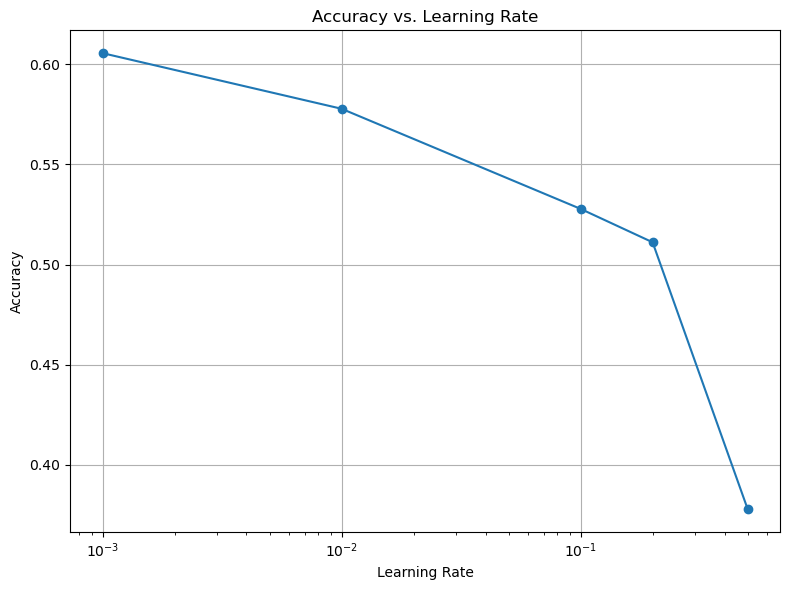

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Extract input features (X) and target labels (y)
X = df.drop('Label', axis=1)  # Assuming 'target' is the name of the column containing the labels
y = df['Label']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.5]

accuracies = []

# Iterate through different learning rates
for learning_rate in learning_rates:
    print(f"Testing with learning rate: {learning_rate}")

    # Create an MLPClassifier with the specified learning rate
    mlp_classifier = MLPClassifier(
        hidden_layer_sizes=(100,),  # Define hidden layer size
        activation='relu',
        learning_rate_init=learning_rate,
        max_iter=1000  # Maximum number of iterations
    )

    # Fit the MLPClassifier to the training data
    mlp_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = mlp_classifier.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with learning rate {learning_rate}: {accuracy * 100:.2f}%")

# Plot the accuracy results
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-')
plt.title("Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xscale('log')  # Use a logarithmic scale for the learning rates
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
